In [1]:
%matplotlib inline
from deep_net_topics import test_deepnet, Config, plot_stats

# Simple 2-layer Deepnet

Here are parameters for the configuration tested below, this is the one that has given me the best accuracy/auc so far.

## Architecture:
**Input**: 137 Features, 88 congressman-level + 50 Topics.

**Layer 1**: 64 units, RELU activation, L2 regularization

**Layer 2**: 16 units, RELU activation, L2 regularization

**output**: softmax activation, L2 regularization

## Hyperparameters
1. batch_size = 64
2. total epochs = 100
3. learning rate = 1e-2
4. regularization coefficient = 0.01
5. dropout probability = 0.1

## Notes
1. **Adding layers** doesn't imporove accuracy and causes optimizer to get stuck on local minima. Same goes for changing layer sizes.
2. **Lower learning rate** doesn't decrease final loss, higher leads to slightly worse optima.
3. **Different activation functions** on the hidden layers massively decrease performace both in terms of accuracy and auc.
4. **Sample weights**. Given how skewed the classes are it would seem that weighting predictions by the ratio of one class to another (common practice for dealing with skewed classes) may be a good idea. So far I've found that:
    * when nays are upweighted the model predicts more of them, leading to slightly worse AUC and accuracy
    * when nays are not upweighted the model has higher accuracy and AUC, making this the better option for the time being. 
    * the optimizer stops at the same local minimum in both cases. 
5. **In general**: Works as expected. Improvement in accuracy is tiny over all yea, but auc increases massively.

## Final Stats
### Unweighted samples
1. Training set accuracy: .89564 (baseline all yea: .79)
2. Validation set accuracy: 0.88495 (baseline all yea: .84)
3. Training set AUC: 0.93854 (baseline all yea: .5)
4. Validation set AUC: 0.784292 (baseline all yea: .5)

### Weighted samples
1. Training set accuracy: 0.73942 (baseline all yea: .79)
2. Validation set accuracy: 0.63857 (baseline all yea: .84)
3. Training set AUC: 0.870515 (baseline all yea: .5)
4. Validation set AUC: 0.715127 (baseline all yea: .5)


In [2]:
## No data weights
config = Config()
config.max_epochs = 100
config.add_data_weights = False
model = test_deepnet(config)

Loss at epoch 0: 12.27 (2.169 sec)
Training accuracy 0.78350, 4663 nays predicted, auc: 0.620079
Validation accuracy 0.80592, 150 nays predicted, auc: 0.504762
Loss at epoch 1: 4.62 (2.151 sec)
Training accuracy 0.79592, 1194 nays predicted, auc: 0.637676
Validation accuracy 0.83141, 36 nays predicted, auc: 0.502035
Loss at epoch 2: 4.12 (2.096 sec)
Training accuracy 0.79711, 361 nays predicted, auc: 0.654220
Validation accuracy 0.83676, 13 nays predicted, auc: 0.518068
Loss at epoch 3: 3.71 (1.885 sec)
Training accuracy 0.79703, 184 nays predicted, auc: 0.694957
Validation accuracy 0.83758, 9 nays predicted, auc: 0.517752
Loss at epoch 4: 3.35 (1.927 sec)
Training accuracy 0.79713, 101 nays predicted, auc: 0.750133
Validation accuracy 0.83840, 7 nays predicted, auc: 0.488722
Loss at epoch 5: 3.02 (1.969 sec)
Training accuracy 0.79718, 441 nays predicted, auc: 0.784914
Validation accuracy 0.83758, 9 nays predicted, auc: 0.501623
Loss at epoch 6: 2.73 (1.893 sec)
Training accuracy 0.810

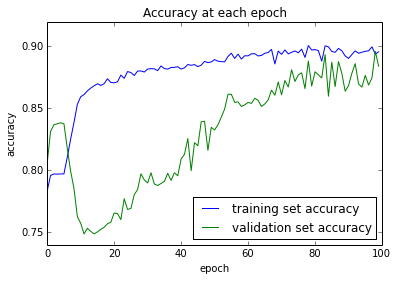

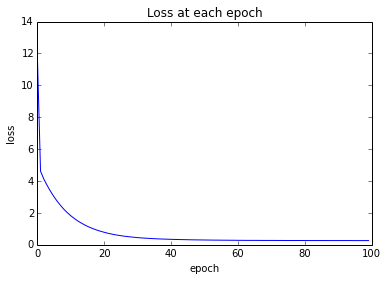

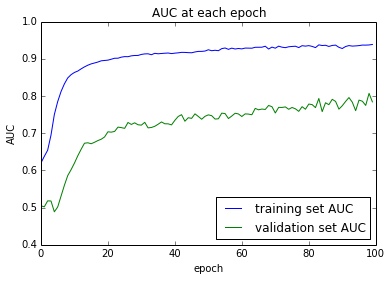

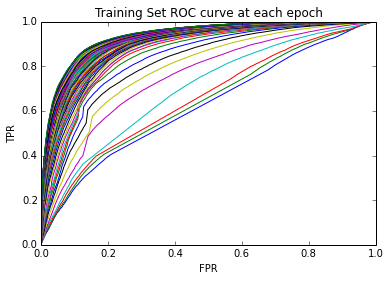

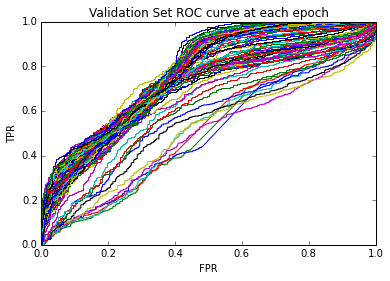

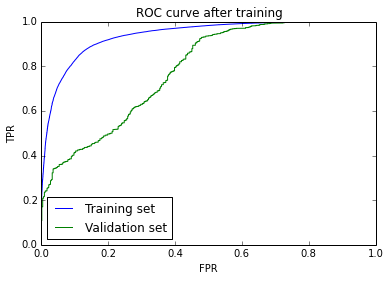

In [3]:
plot_stats(model, config)

In [4]:
## upweighting nay votes
config = Config()
config.max_epochs = 100
config.add_data_weights = True
model = test_deepnet(config)

Loss at epoch 0: 10.77 (2.025 sec)
Training accuracy 0.79701, 0 nays predicted, auc: 0.558668
Validation accuracy 0.84128, 0 nays predicted, auc: 0.462429
Loss at epoch 1: 5.02 (1.980 sec)
Training accuracy 0.79701, 0 nays predicted, auc: 0.560295
Validation accuracy 0.84128, 0 nays predicted, auc: 0.449560
Loss at epoch 2: 4.20 (1.976 sec)
Training accuracy 0.79068, 1389 nays predicted, auc: 0.558928
Validation accuracy 0.82442, 59 nays predicted, auc: 0.452063
Loss at epoch 3: 3.69 (1.975 sec)
Training accuracy 0.77616, 4953 nays predicted, auc: 0.568174
Validation accuracy 0.78084, 209 nays predicted, auc: 0.470608
Loss at epoch 4: 3.30 (1.978 sec)
Training accuracy 0.68624, 25558 nays predicted, auc: 0.587116
Validation accuracy 0.62706, 869 nays predicted, auc: 0.554137
Loss at epoch 5: 2.96 (1.970 sec)
Training accuracy 0.49561, 65838 nays predicted, auc: 0.616355
Validation accuracy 0.40049, 1738 nays predicted, auc: 0.632267
Loss at epoch 6: 2.66 (1.978 sec)
Training accuracy 0

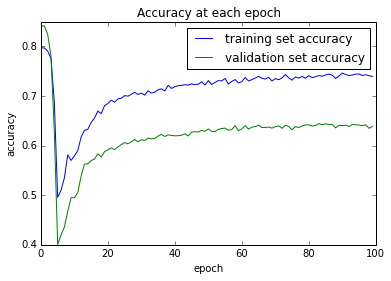

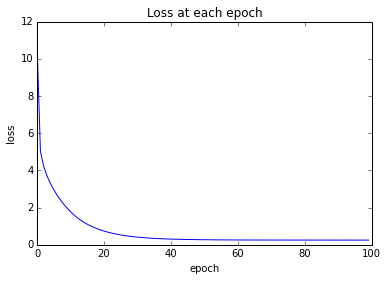

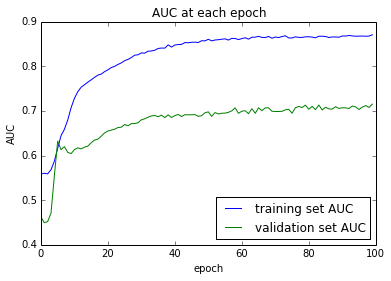

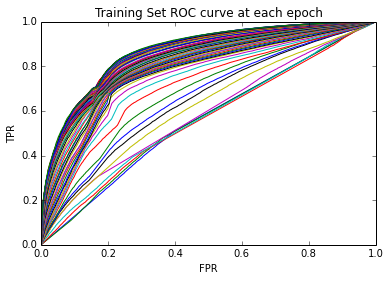

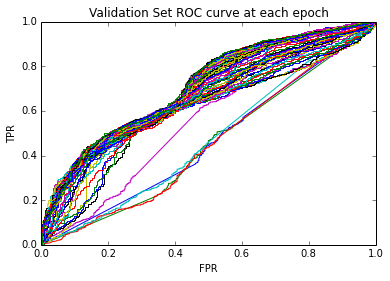

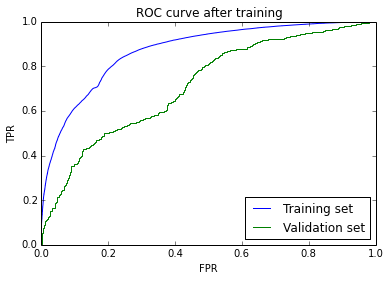

In [5]:
plot_stats(model, config)

## Easy fixes
1. Implement batch renormalization (not sure if it will do anything in our case)
2. Implement test predictions
3. Find optimal sample weighting

## Ways to Improve the model

I can come up with at lest 3 ways in which we can take this forward and make it more interesting from a theoretical perspective, even if accuracy isn't improved. Keep well in mind that these 3 are not mutually exclusive and it's likely that the best possible model implements all three:

1. **Embeddings** Do the feature reduction on the bill text ourselves, by implementing an autoencoder as a step of our prediction model in a way such that embeddings are optimized for prediction, rather than text reconstruction. 

2. **Recurrent Net**: This model treats each observation as IID, which isn't the case. We could force the model to take into account both the voting history of each congressman and of all the other congressmen in relation to each specific one with a recurrent network. 

3. **Convolutional Net** In order to best model the voting dependencies of one congressman on others, we could treat all the votes on a bill as a datapoint, I.E: a matrix with congressmen on both rows and columns and wether they voted in the same way on that bill or didn't. This would effectively be the same as an image and we could use convolutions to reduce input and make predictions. Mixing this with history dependence(RNN) would make for a pretty awesome end product. 